<a href="https://colab.research.google.com/github/sonadevassia/internship_customer_churn/blob/main/internsip_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER CHURN PREDICTION**

**Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.drop(['RowNumber',],axis=1,inplace=True)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Geography']=lab.fit_transform(df['Geography'])
df['Gender']=lab.fit_transform(df['Gender'])
df['Surname']=lab.fit_transform(df['Surname'])
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Exited', ylabel='count'>

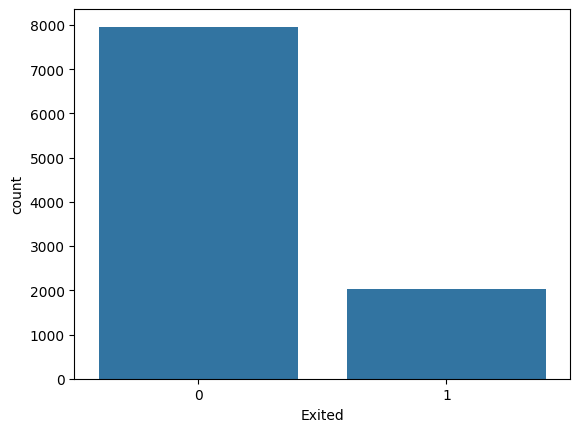

In [ ]:
sns.countplot(x='Exited',data=df)

In [ ]:
df.corr()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005689,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Surname,0.005689,1.000000,0.007489,-0.022878,-0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822
CreditScore,0.005308,0.007489,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.006516,-0.022878,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002641,-0.002049,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.009497,0.005550,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,-0.017412,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.002657,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,-0.016460,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.008993,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


<Axes: >

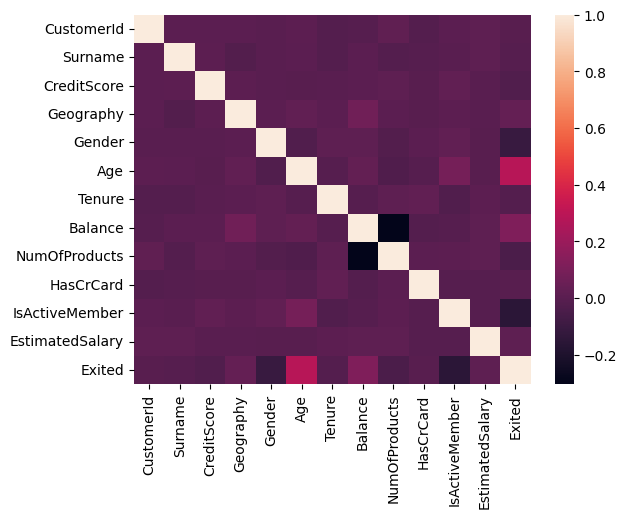

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x=df.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Testing & Training Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,619,2,0,32,4,175406.13,2,1,1,172792.43
2603,643,1,0,34,7,160426.07,1,0,1,188533.11
7738,561,0,1,33,6,0.00,2,0,0,173680.39
1579,618,1,1,41,8,37702.79,1,1,1,195775.48
5058,714,0,1,37,9,148466.93,2,0,1,151280.96
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [ ]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
8014,731,2,0,39,2,126816.18,1,1,1,74850.93
1074,535,0,0,31,7,111855.04,2,1,1,36278.89
3063,609,0,1,32,7,71872.19,1,1,1,151924.90
6487,580,0,1,31,2,0.00,2,0,1,64014.24


In [ ]:
y_train

9069    1
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 7000, dtype: int64

In [ ]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: Exited, Length: 3000, dtype: int64

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

**Model Evaluation - Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score
acc_lr= accuracy_score(y_test, y_pred_lr)
acc_lr

0.8006666666666666

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100, criterion='gini')
rfc.fit(x_train, y_train)
y_pred_rfc= rfc.predict(x_test)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

**Model Evaluation - Random Forest**

In [ ]:
from sklearn.metrics import accuracy_score
acc_rfc= accuracy_score(y_test, y_pred_rfc)
acc_rfc

0.866

**Support Vector Calssifier**

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred_svc= svc.predict(x_test)
y_pred_svc


array([0, 0, 0, ..., 0, 0, 0])

**Model Evaluation - SVC**

In [ ]:
from sklearn.metrics import accuracy_score
acc_svc= accuracy_score(y_test, y_pred_svc)
acc_svc

0.8053333333333333